Permalink:

https://colab.research.google.com/drive/1YrOEz-sFGczoIfn0d4Hn_fplKQeNExiy?usp=sharing

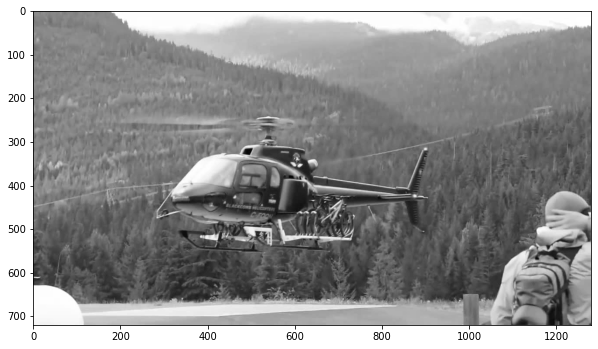

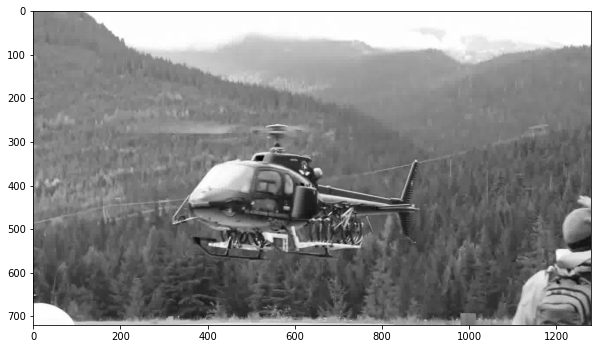

In [2]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt


def url_to_image(url):
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2GRAY)

url1 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/frames/v001.jpg"
url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/frames/v011.jpg"

#scale_factor = 0.5

img1 = url_to_image(url1)
img2 = url_to_image(url2)

fig= plt.figure(figsize=(10,10))
plt.imshow(img1, cmap = 'gray')
plt.show()  

fig= plt.figure(figsize=(10,10))
plt.imshow(img2, cmap = 'gray')
plt.show()

400 440 840 890
im_height, im_width (720, 1280)
roi_height, roi_width (40, 50)


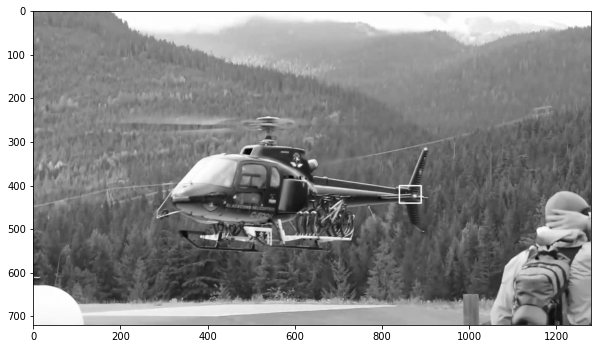

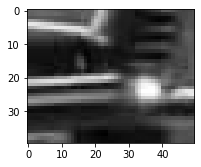

In [3]:
roi_coord = np.array([[840, 400],[890, 440]], np.int)
print(roi_coord[0,1],roi_coord[1,1], roi_coord[0,0], roi_coord[1,0])
roi = img1[roi_coord[0,1]: roi_coord[1,1], roi_coord[0,0]: roi_coord[1,0]]
im_height, im_width = img1.shape
roi_height, roi_width = roi.shape
print(f"im_height, im_width {im_height, im_width}")
print(f"roi_height, roi_width {roi_height, roi_width}")
imc = img1.copy()
imc = cv2.rectangle(imc, tuple(roi_coord[0]), tuple(roi_coord[1]), 250, 2, cv2.LINE_AA)
fig= plt.figure(figsize=(10,10))
plt.imshow(imc, cmap = 'gray')
plt.show() 
fig= plt.figure(figsize=(3,3))
plt.imshow(roi, cmap = 'gray')
plt.show() 

26


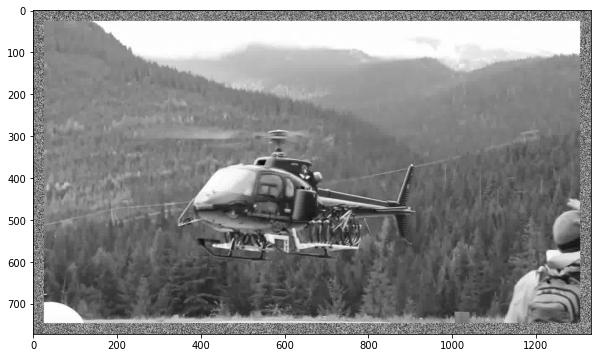

In [5]:
p = max(roi_height, roi_width )//2 + 1
print(p)

#target image
imc = img2.copy()

img_padded = np.random.randint(255, size = (imc.shape[0] + p*2, imc.shape[1] + p*2), dtype=np.uint8)
#img_padded = np.zeros((imc.shape[0] + p*2, imc.shape[1] + p*2), dtype=np.uint8)
img_padded[p:img_padded.shape[0]-p, p:img_padded.shape[1]-p] = imc
fig= plt.figure(figsize=(10,10))
plt.imshow(img_padded, cmap = 'gray')
plt.show() 

In [6]:
def coef(templ, target):
  t_mean = np.mean(templ.astype(np.float))
  targ_mean = np.mean(target.astype(np.float))
  numerator  = np.sum((templ.astype(np.float) - t_mean) * (target.astype(np.float) - targ_mean)) 
  denomin = np.sqrt(np.sum(np.square(templ.astype(np.float) - t_mean))) * np.sqrt(np.sum(np.square(target.astype(np.float) - targ_mean)))
  coef = numerator/denomin
  if np.isnan(coef) : coef = 0
  return coef


im_height, im_width = img_padded.shape
px = roi_width//2
py = roi_height//2

sad_mat = np.ones(img_padded.shape, np.int) * 500000
ssd_mat = np.ones(img_padded.shape, np.int) * 500000
ncc_mat = np.zeros(img_padded.shape, np.float) 

for y in range(py, im_height  - py):
  for x in range(px, im_width-px):
    patch = img_padded[y-py: y+py, x-px: x+px]
    sad_mat[y,x] = np.sum(np.abs(roi - patch))
    ssd_mat[y,x] = np.sum(np.square(roi - patch))
    ncc_mat[y,x] = coef(roi, patch)

sad_mat = sad_mat[p: im_height-p, p: im_width-p]
ssd_mat = ssd_mat[p: im_height-p, p: im_width-p]
ncc_mat = ncc_mat[p: im_height-p, p: im_width-p]



C:\Users\Yaroslav\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


In [7]:
print(f"Min value SAD {np.min(sad_mat)}")
sad_y, sad_x = np.unravel_index(sad_mat.argmin(), sad_mat.shape)
print(f"SAD Found match at position y,x {sad_y, sad_x}\n")

print(f"Min value SSD {np.min(ssd_mat)}")
ssd_y, ssd_x = np.unravel_index(ssd_mat.argmin(), ssd_mat.shape)
print(f"SSD Found match at position y,x {ssd_y, ssd_x}\n")

print(f"Max value NCC {np.max(ncc_mat)}")
ncc_y, ncc_x = np.unravel_index(ncc_mat.argmax(), ncc_mat.shape)
print(f"NCC Found match at position y,x {ncc_y, ncc_x}\n")


Min value SAD 148496
SAD Found match at position y,x (543, 1257)

Min value SSD 158288
SSD Found match at position y,x (445, 848)

Max value NCC 0.7057563764068758
NCC Found match at position y,x (444, 848)



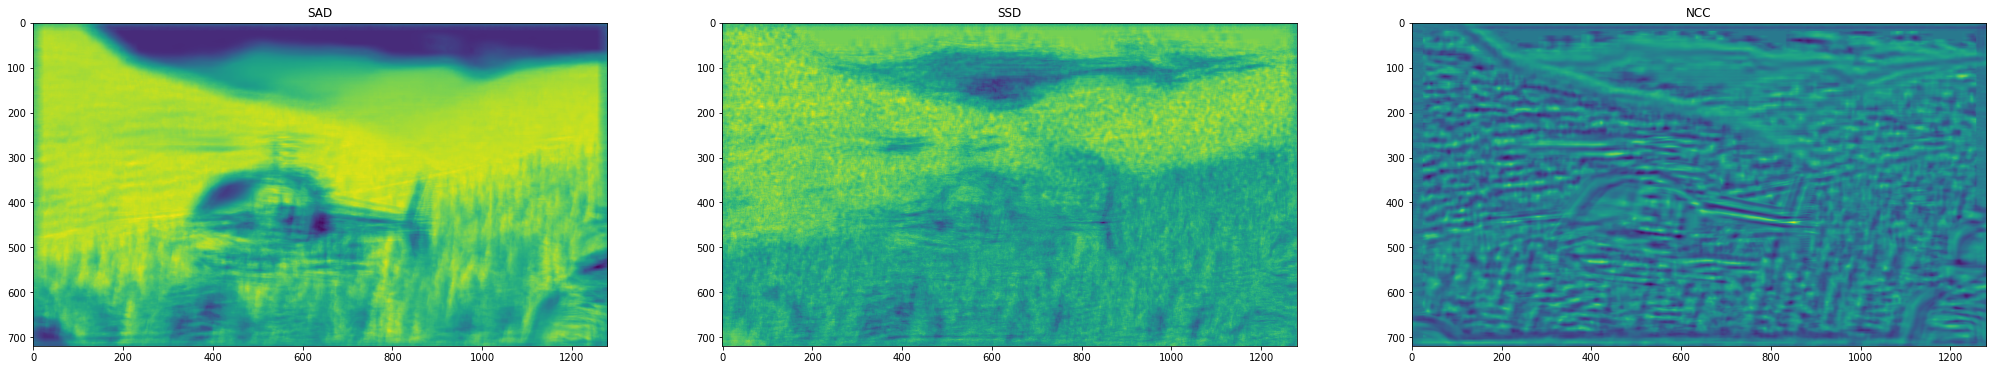

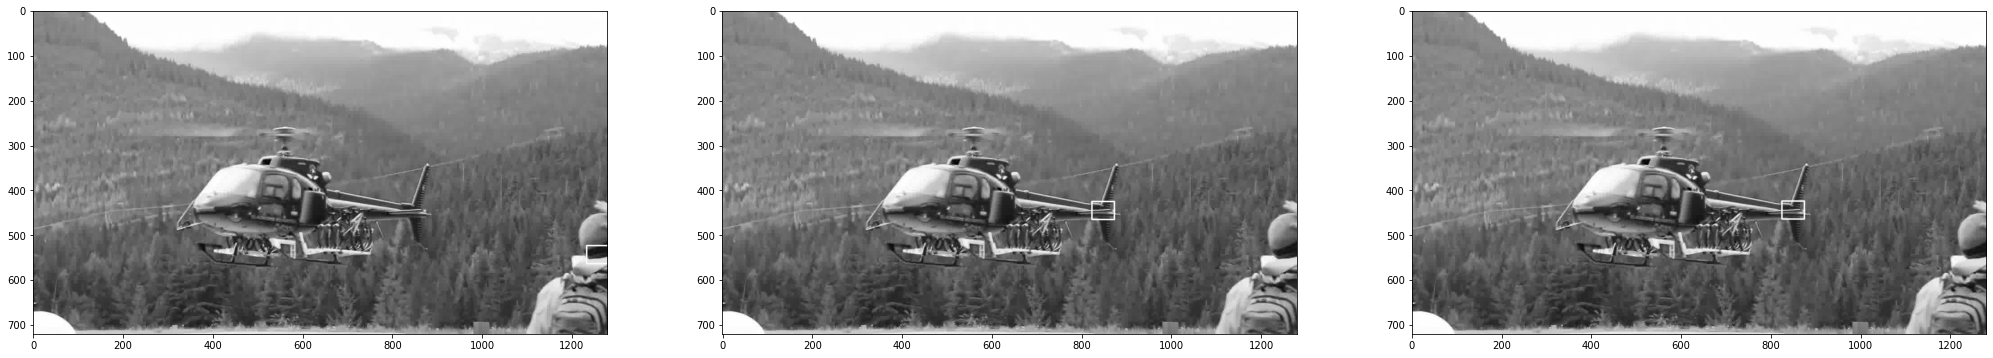

In [9]:
plt.rcParams['figure.figsize'] = (35, 35) # set default size of plots
fig, axs = plt.subplots(1, 3)

plt.subplot(1, 3, 1)
plt.imshow(sad_mat)
plt.title('SAD')

plt.subplot(1, 3, 2)
plt.imshow(ssd_mat)
plt.title('SSD')

plt.subplot(1, 3, 3)
plt.imshow(ncc_mat)
plt.title('NCC')

plt.show()


img_sad = img2.copy()
img_sad = cv2.rectangle(img_sad, (sad_x - px, sad_y - py), (sad_x + px, sad_y + py), 250, 2, cv2.LINE_AA)
img_ssd = img2.copy()
img_ssd = cv2.rectangle(img_ssd, (ssd_x - px, ssd_y - py), (ssd_x + px, ssd_y + py), 250, 2, cv2.LINE_AA)
img_ncc = img2.copy()
img_ncc = cv2.rectangle(img_ncc, (ncc_x - px, ncc_y - py), (ncc_x + px, ncc_y + py), 250, 2, cv2.LINE_AA)


plt.subplot(1, 3, 1)
plt.imshow(img_sad, cmap = 'gray')

plt.subplot(1, 3, 2)
plt.imshow(img_ssd, cmap = 'gray')

plt.subplot(1, 3, 3)
plt.imshow(img_ncc, cmap = 'gray')
plt.show()



## SSD and NCC succeeded, SAD failed - SAD is good only for small neighbourhood distances in epipolar lines